## Importing The Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import opendatasets as od

In [3]:
data = pd.read_csv('Myntra Fasion Clothing.csv')

In [4]:
data.head(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [5]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [6]:
print(data['URL'][0])

https://www.myntra.com/jeans/roadster/roadster-men-navy-blue-slim-fit-mid-rise-clean-look-jeans/2296012/buy


In [7]:
data['Description'][0]

'roadster men navy blue slim fit mid rise clean look jeans'

In [8]:
(data.groupby('Product_id')['URL'].count()>1).value_counts()

URL
False    526564
Name: count, dtype: int64

In [9]:
len(data.drop_duplicates(subset=['Product_id']))
data.shape

(526564, 13)

In [10]:
data['category_by_Gender'].nunique()

2

In [11]:
data['Category'].nunique()

8

In [12]:
data['Individual_category'].nunique()

92

In [13]:
data['BrandName'].nunique()

2088

In [14]:
data['Product_id'].nunique()

526564

## Data Cleaning 

In [15]:
print(data.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64


In [16]:
print(data.isnull().mean())

URL                      0.000000
Product_id               0.000000
BrandName                0.000000
Category                 0.000000
Individual_category      0.000000
category_by_Gender       0.000000
Description              0.000000
DiscountPrice (in Rs)    0.366827
OriginalPrice (in Rs)    0.000000
DiscountOffer            0.141115
SizeOption               0.000000
Ratings                  0.638388
Reviews                  0.638388
dtype: float64


In [17]:
data[data['DiscountPrice (in Rs)'].isnull()][:3]

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0
5,https://www.myntra.com/tops/mast--harbour/mast...,2490950,Mast & Harbour,Western,tops,Women,mast harbour women yellow solid tank top,NaN,599.0,40% OFF,"XS, S, M, L, XL",4.4,999.0
7,https://www.myntra.com/tops/mayra/mayra-pink-e...,8439415,Mayra,Western,tops,Women,mayra pink embroidered a line pure cotton top,NaN,1395.0,58% OFF,"S, M, L, XL",3.7,998.0


In [18]:
# Separating The Null Value Data And Normal Data
data_DP_null = data[data['DiscountPrice (in Rs)'].isnull()]
data_DP = data[data['DiscountPrice (in Rs)'].notnull()]

print(data.shape,data_DP.shape,data_DP_null.shape)

(526564, 13) (333406, 13) (193158, 13)


In [19]:
data_DP_null.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
dtype: object

In [20]:
data_DP_null.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74122
SizeOption                    0
Ratings                  120311
Reviews                  120311
dtype: int64

### Data Cleaning for Discount Price

In [21]:
#Replaces NaN values in the DiscountOffer column with 0
#NaN menas there is no offer so we can fill zero insted of nan
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].fillna(0)

In [22]:
#Converts DiscountOffer column to string type
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].astype(str)
print(data_DP_null['DiscountOffer'])

4         35% OFF
5         40% OFF
7         58% OFF
8               0
9               0
           ...   
526559          0
526560          0
526561          0
526562          0
526563          0
Name: DiscountOffer, Length: 193158, dtype: object


In [23]:
#creates a new feature (DiscountOffer_len) that calculates the length of each string
data_DP_null['DiscountOffer_len'] = data_DP_null['DiscountOffer'].apply(lambda x:len(x))

In [24]:
#counts the frequency of each length
data_DP_null['DiscountOffer_len'].value_counts()

DiscountOffer_len
7     109474
1      74122
11      4018
12      2635
6       1855
9        896
10       158
Name: count, dtype: int64

In [25]:
#understand the formatting patterns in discount offers for each length

print(data_DP_null[data_DP_null['DiscountOffer_len']==1].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==6].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==7].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==9].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==10].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==11].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==12].iloc[0]['DiscountOffer'])

0
5% OFF
35% OFF
 45 % OFF
Rs. 38 OFF
Rs. 500 OFF
Rs. 1100 OFF


In [26]:
# Creates a new DataFrame filtered to only rows with that exact string length
# Examine how discount offers are structured at different length
data1 = data_DP_null[data_DP_null['DiscountOffer_len']==1]
data6 = data_DP_null[data_DP_null['DiscountOffer_len']==6]
data7 = data_DP_null[data_DP_null['DiscountOffer_len']==7]
data9 = data_DP_null[data_DP_null['DiscountOffer_len']==9]
data10 = data_DP_null[data_DP_null['DiscountOffer_len']==10]
data11 = data_DP_null[data_DP_null['DiscountOffer_len']==11]
data12 = data_DP_null[data_DP_null['DiscountOffer_len']==12]

In [27]:
#creating a new Discount_Seg column by extracting the numerical discount value from the DiscountOffer strings
data1['Discount_Seg'] = data1['DiscountOffer'].apply(lambda x:x.split('%')[0])
data6['Discount_Seg'] = data6['DiscountOffer'].apply(lambda x:x.split('%')[0])
data7['Discount_Seg'] = data7['DiscountOffer'].apply(lambda x:x.split('%')[0])
data9['Discount_Seg'] = data9['DiscountOffer'].apply(lambda x:x.split('%')[0])
data10['Discount_Seg'] = data10['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])
data11['Discount_Seg'] = data11['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])
data12['Discount_Seg'] = data12['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])

In [28]:
# converts the Discount_Seg column to float type 

data1['Discount_Seg'] = data1['Discount_Seg'].astype(float)
data6['Discount_Seg'] = data6['Discount_Seg'].astype(float)
data7['Discount_Seg'] = data7['Discount_Seg'].astype(float)
data9['Discount_Seg'] = data9['Discount_Seg'].astype(float)
data10['Discount_Seg'] = data10['Discount_Seg'].astype(float)
data11['Discount_Seg'] = data11['Discount_Seg'].astype(float)
data12['Discount_Seg'] = data12['Discount_Seg'].astype(float)

In [29]:
#calculates the final discounted price (discount_seg_price) 
#For Percentage Discounts- OriginalPrice - (OriginalPrice * Discount_Seg/100) 
# For Absolute Amount Discounts - OriginalPrice - Discount_Seg

data1['discount_seg_price'] = data1['OriginalPrice (in Rs)']-data1['Discount_Seg']
data6['discount_seg_price'] = data6['OriginalPrice (in Rs)']-(data6['OriginalPrice (in Rs)']*data6['Discount_Seg']/100)
data7['discount_seg_price'] = data7['OriginalPrice (in Rs)']-(data7['OriginalPrice (in Rs)']*data7['Discount_Seg']/100)
data9['discount_seg_price'] = data9['OriginalPrice (in Rs)']-(data9['OriginalPrice (in Rs)']*data9['Discount_Seg']/100)
data10['discount_seg_price'] = data10['OriginalPrice (in Rs)']-data10['Discount_Seg']
data11['discount_seg_price'] = data11['OriginalPrice (in Rs)']-data11['Discount_Seg']
data12['discount_seg_price'] = data12['OriginalPrice (in Rs)']-data12['Discount_Seg']

In [30]:
#Concatenation:

print('Before',data_DP_null.shape)
data_DP_null =pd.concat([data1,data6,data7,data9,data10,data11,data12],axis=0)
print('After',data_DP_null.shape)

Before (193158, 14)
After (193158, 16)


In [31]:
print(data_DP_null.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  120311
Reviews                  120311
DiscountOffer_len             0
Discount_Seg                  0
discount_seg_price            0
dtype: int64


In [32]:
data_DP_null[['DiscountPrice (in Rs)','OriginalPrice (in Rs)','DiscountOffer','discount_seg_price']]

,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,discount_seg_price
8,NaN,1098.0,0,1098.0
9,NaN,2749.0,0,2749.0
11,NaN,699.0,0,699.0
17,NaN,3999.0,0,3999.0
20,NaN,1298.0,0,1298.0
...,...,...,...,...
503949,NaN,7199.0,Rs. 4000 OFF,3199.0
503950,NaN,7199.0,Rs. 4900 OFF,2299.0
504004,NaN,7399.0,Rs. 5100 OFF,2299.0
504178,NaN,7599.0,Rs. 4200 OFF,3399.0


In [33]:
#creates two new calculated fields
#Calculates absolute rupee discount amount
data_DP_null['Price_diff'] = data_DP_null['OriginalPrice (in Rs)'] - data_DP_null['discount_seg_price']

#Converts all discounts to standardized percentages
data_DP_null['discount_seg_%']= round(data_DP_null['Price_diff']*100/data_DP_null['OriginalPrice (in Rs)'])

In [34]:
data_DP_null.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'DiscountOffer_len', 'Discount_Seg', 'discount_seg_price',
       'Price_diff', 'discount_seg_%'],
      dtype='object')

In [35]:
# removes intermediate calculation columns
del data_DP_null['Price_diff']
del data_DP_null['DiscountOffer_len']
del data_DP_null['discount_seg_price']
del data_DP_null['Discount_Seg']

In [36]:
data_DP_null

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
8,https://www.myntra.com/tshirts/roadster/roadst...,17381394,Roadster,Western,tshirts,Women,roadster women pack of 2 solid t shirts,NaN,1098.0,0,"XS, S, M, L, XL",4.3,997.0,0.0
9,https://www.myntra.com/jeans/herenow/herenow-m...,2359257,HERE&NOW,Bottom Wear,jeans,Men,herenow men blue slim fit mid rise clean look ...,NaN,2749.0,0,"28, 30, 32, 34, 36",3.5,996.0,0.0
11,https://www.myntra.com/tshirts/roadster/roadst...,10307375,Roadster,Topwear,tshirts,Men,roadster men navy blue white striped polo col...,NaN,699.0,0,"XS, S, M, L, XL, XXL, 3XL, 4XL",4.1,996.0,0.0
17,https://www.myntra.com/kurta-sets/sangria/sang...,10561392,Sangria,Plus Size,kurta-sets,Women,sangria women green off white printed kurta w...,NaN,3999.0,0,"XS, S, M, L, XL, XXL, 3XL",4.3,995.0,0.0
20,https://www.myntra.com/tshirts/roadster/roadst...,17385142,Roadster,Western,tshirts,Women,roadster women pack of 2 printed cotton t shirt,NaN,1298.0,0,"XS, S, M, L, XL",4.4,994.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503949,https://www.myntra.com/dresses/fashor/fashor-b...,16989672,FASHOR,Western,dresses,Women,fashor black beige ethnic motifs embroidered ...,NaN,7199.0,Rs. 4000 OFF,"S, M, L, XL, XXL",NaN,NaN,56.0
503950,https://www.myntra.com/dresses/fashor/fashor-w...,17783562,FASHOR,Western,dresses,Women,fashor women green floral printed dress with d...,NaN,7199.0,Rs. 4900 OFF,"S, M, L, XL, XXL",NaN,NaN,68.0
504004,https://www.myntra.com/dresses/fashor/fashor-m...,16897510,FASHOR,Western,dresses,Women,fashor mustard red ethnic motifs ethnic maxi ...,NaN,7399.0,Rs. 5100 OFF,"M, L, XL, XXL, 3XL",NaN,NaN,69.0
504178,https://www.myntra.com/dresses/fashor/fashor-o...,17213218,FASHOR,Western,dresses,Women,fashor off white black a line midi dress,NaN,7599.0,Rs. 4200 OFF,"S, M, L, XL, XXL",NaN,NaN,55.0


In [37]:
#alculates the discount percentage for products 
data_DP['discount_seg_%'] = round(data_DP['DiscountPrice (in Rs)']*100/data_DP['OriginalPrice (in Rs)'])
data_DP

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,55.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,45.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,45.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,69.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443936,https://www.myntra.com/tops/dechen/dechen-red-...,17353876,DECHEN,Western,tops,Women,dechen red white print top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443937,https://www.myntra.com/tops/dechen/dechen-whit...,17353938,DECHEN,Western,tops,Women,dechen white black polka dots print top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443938,https://www.myntra.com/tops/dechen/dechen-blac...,17353860,DECHEN,Western,tops,Women,dechen black white polka dots printed top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443939,https://www.myntra.com/tops/dechen/dechen-navy...,17353926,DECHEN,Western,tops,Women,dechen navy blue floral printed top with gathe...,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0


In [38]:
# Absolute Discount Amount-Calculates the exact rupee difference between original and discounted prices
data_DP['price_diff'] = data_DP['OriginalPrice (in Rs)']-data_DP['DiscountPrice (in Rs)']

# Percentage Discount-Standardizes discounts to percentages for cross-product comparison
data_DP['discount_seg_%'] = round(data_DP['price_diff']*100/data_DP['OriginalPrice (in Rs)'])

In [39]:
data_DP.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
discount_seg_%           float64
price_diff               float64
dtype: object

In [40]:
del data_DP['price_diff']

In [41]:
#Concatenating Cleaned Data and Normal Data
# data_DP: Products that originally had missing discount prices (now processed)
# data_DP_null: Products that had discount prices from the beginning

print('After',data.shape)
data_new = pd.concat([data_DP,data_DP_null],axis=0)
print('Before',data_new.shape)

After (526564, 13)
Before (526564, 14)


In [42]:
data_new.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'discount_seg_%'],
      dtype='object')

In [43]:
data_new.head(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,45.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,55.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,55.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,31.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,60.0


In [44]:
print(data_new.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer               184
SizeOption                    0
Ratings                  336152
Reviews                  336152
discount_seg_%                0
dtype: int64


### Handling Missing Values in the 'Ratings' and 'Reviews' Columns

In [45]:
data_new['Ratings'] = data_new['Ratings'].fillna(0)
data_new['Reviews'] = data_new['Reviews'].fillna(0)

In [46]:
print(data_new.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer               184
SizeOption                    0
Ratings                       0
Reviews                       0
discount_seg_%                0
dtype: int64


In [47]:
#creates a new binary gender column by converting the categorical category_by_Gender values into numerical dummy variables

data_new['gender'] = pd.get_dummies(data_new['category_by_Gender'],drop_first = True).astype(int)

In [48]:
data_new[['gender','category_by_Gender']]

,gender,category_by_Gender
0,0,Men
1,0,Men
2,0,Men
3,1,Women
6,0,Men
...,...,...
503949,1,Women
503950,1,Women
504004,1,Women
504178,1,Women


## Feature Engineering and Data Modelling

In [50]:
# Splitting Data into Data With Discount Value and Data With Nan and Zero Discount Value

model_data = data_new[data_new['discount_seg_%']!=0]
Non_Discount_data = data_new[data_new['discount_seg_%']==0]
print(model_data.shape)
print(Non_Discount_data.shape)

(452433, 15)
(74131, 15)



Data Splitting into Training, Validation, and Testing Data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# x-Contains all features except the target discount percentage
# y-  Contains only the target discount percentage values

X = model_data.drop(['discount_seg_%'],axis=1)
y = model_data['discount_seg_%']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True,stratify=model_data['discount_seg_%'])
#shuffle=True- Randomizes data before splitting
#stratify-  Maintains original target distribution in split
#random_state parameter controls the randomness of data shuffling and splitting in train_test_split()
#why 42 - No Mathematical Significance-just a tradition.-some scinetis

#Train-Validation Split
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.33,random_state=42)



### Feature Creation On Training Data

In [53]:
#create new dataframe in which Groups brands and calculates mean ratingsin training data

check = X_train.groupby('BrandName')['Ratings'].mean().reset_index(name='rating')
print('Brand Have Ratings',check[check['rating']!=0].shape[0])
print('Brand do not Have Ratings',check[check['rating']==0].shape[0])

Brand Have Ratings 1318
Brand do not Have Ratings 432


In [54]:
#similar for reviews 

check = X_train.groupby('BrandName')['Reviews'].mean().reset_index(name='review')
print('Brand Have Review',check[check['review']!=0].shape[0])
print('Brand do not Have Review',check[check['review']==0].shape[0])

Brand Have Review 1317
Brand do not Have Review 433


In [55]:
#Groups the data by BrandName Calculates two things for each brand

brand_impt = X_train.groupby('BrandName').agg({'Ratings':'mean','Reviews':'sum'}).reset_index()
brand_impt[:2]

,BrandName,Ratings,Reviews
0,1 Stop Fashion,0.037069,3.0
1,109F,1.710526,49.0


In [56]:
#creates a new "Brand_importance" metric

brand_impt['Brand_importance'] = brand_impt['Ratings']*brand_impt['Reviews']
brand_impt

,BrandName,Ratings,Reviews,Brand_importance
0,1 Stop Fashion,0.037069,3.0,0.111207
1,109F,1.710526,49.0,83.815789
2,20Dresses,1.010543,3522.0,3559.132907
3,39 THREADS,0.000000,0.0,0.000000
4,3PIN,0.210769,12.0,2.529231
...,...,...,...,...
1745,urSense,1.892857,56.0,106.000000
1746,urban undress,0.000000,0.0,0.000000
1747,wHAT'S DOwn,0.000000,0.0,0.000000
1748,wild U,0.505882,10.0,5.058824


In [57]:
#adds the Brand_importance feature to multiple datasets (X_train, X_test, X_val, and Non_Discount_data) by merging it from the brand_impt table

print(X_train.shape)
X_train = X_train.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(Non_Discount_data.shape)

(203097, 14)
(203097, 15)
(149303, 14)
(149303, 15)
(100033, 14)
(100033, 15)
(74131, 15)
(74131, 16)


In [58]:
# calculates category popularity by counting how many unique brands operate in each product category
individual_category_popularity = X_train.groupby('Individual_category')['BrandName'].nunique().reset_index(name='ind_cat_popularity')

In [59]:
#adds the ind_cat_popularity metric (number of unique brands per category) to all datasets.

print(X_train.shape)
X_train = X_train.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(Non_Discount_data.shape)

(203097, 15)
(203097, 16)
(149303, 15)
(149303, 16)
(100033, 15)
(100033, 16)
(74131, 16)
(74131, 17)


In [60]:
#calculates category popularity by counting how many products exist in each main category

category_popularity = X_train.groupby('Category')['Product_id'].count().reset_index(name='cat_popularity')

In [61]:
print(X_train.shape)
X_train = X_train.merge(category_popularity, on = 'Category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(category_popularity, on = 'Category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(category_popularity, on = 'Category', how = 'left')
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(category_popularity, on = 'Category', how = 'left')
print(Non_Discount_data.shape)

(203097, 16)
(203097, 17)
(149303, 16)
(149303, 17)
(100033, 16)
(100033, 17)
(74131, 17)
(74131, 18)


## Exploratory Data Analysis on the Model Data

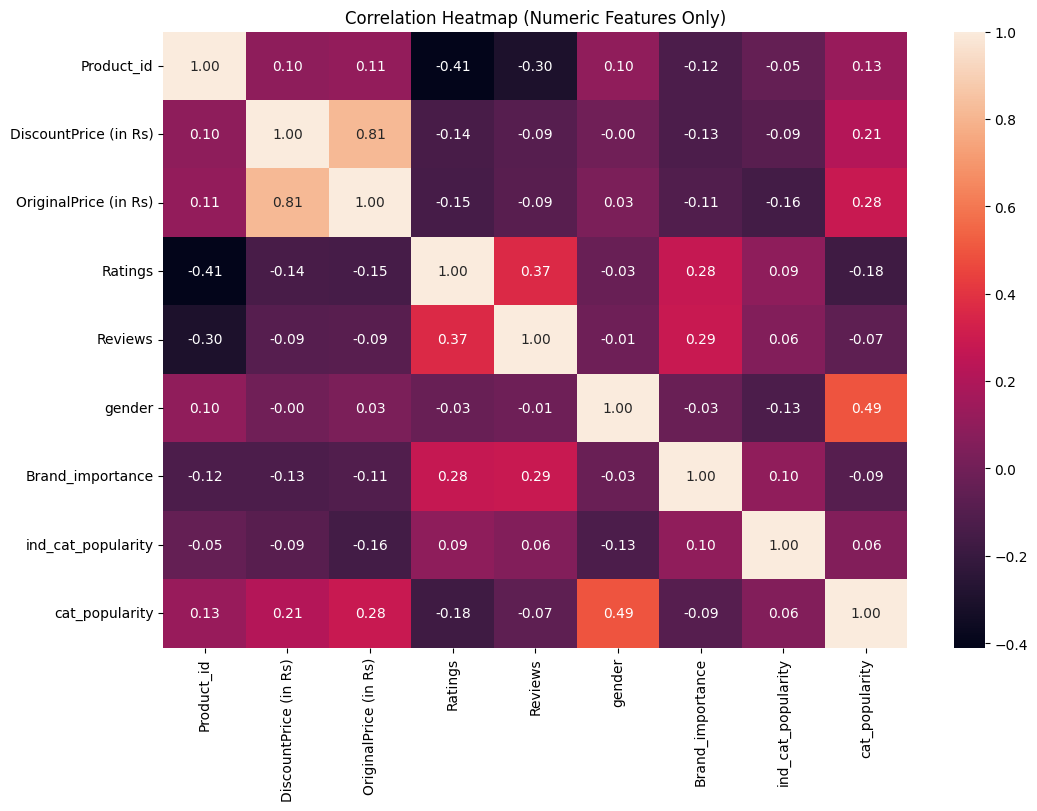

In [62]:
# Select only numeric columns for correlation
numeric_cols = X_train.select_dtypes(include=['int64', 'float64'])

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

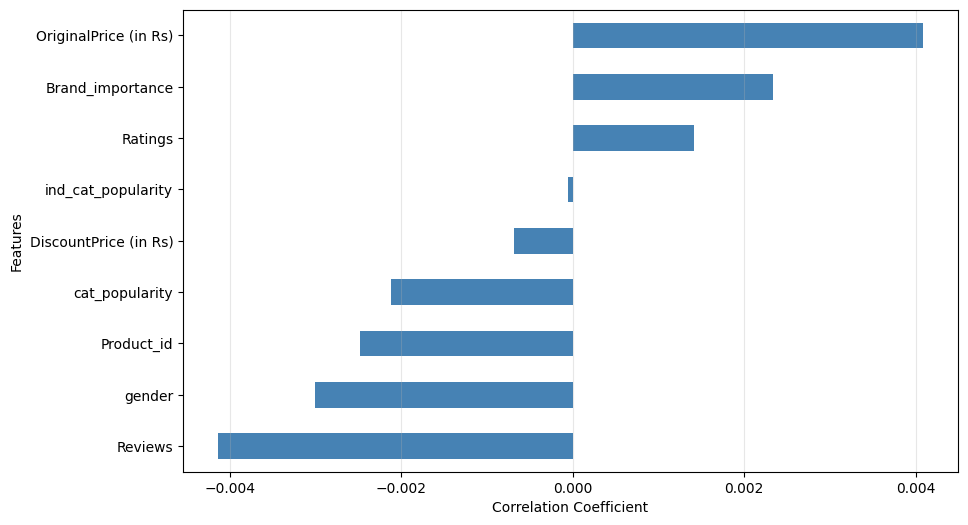

In [63]:

numeric_features = X_train.select_dtypes(include=['int64', 'float64'])

# Calculate correlations with target
correlations = numeric_features.corrwith(y_train)
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='steelblue')
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', alpha=0.3)
plt.show()

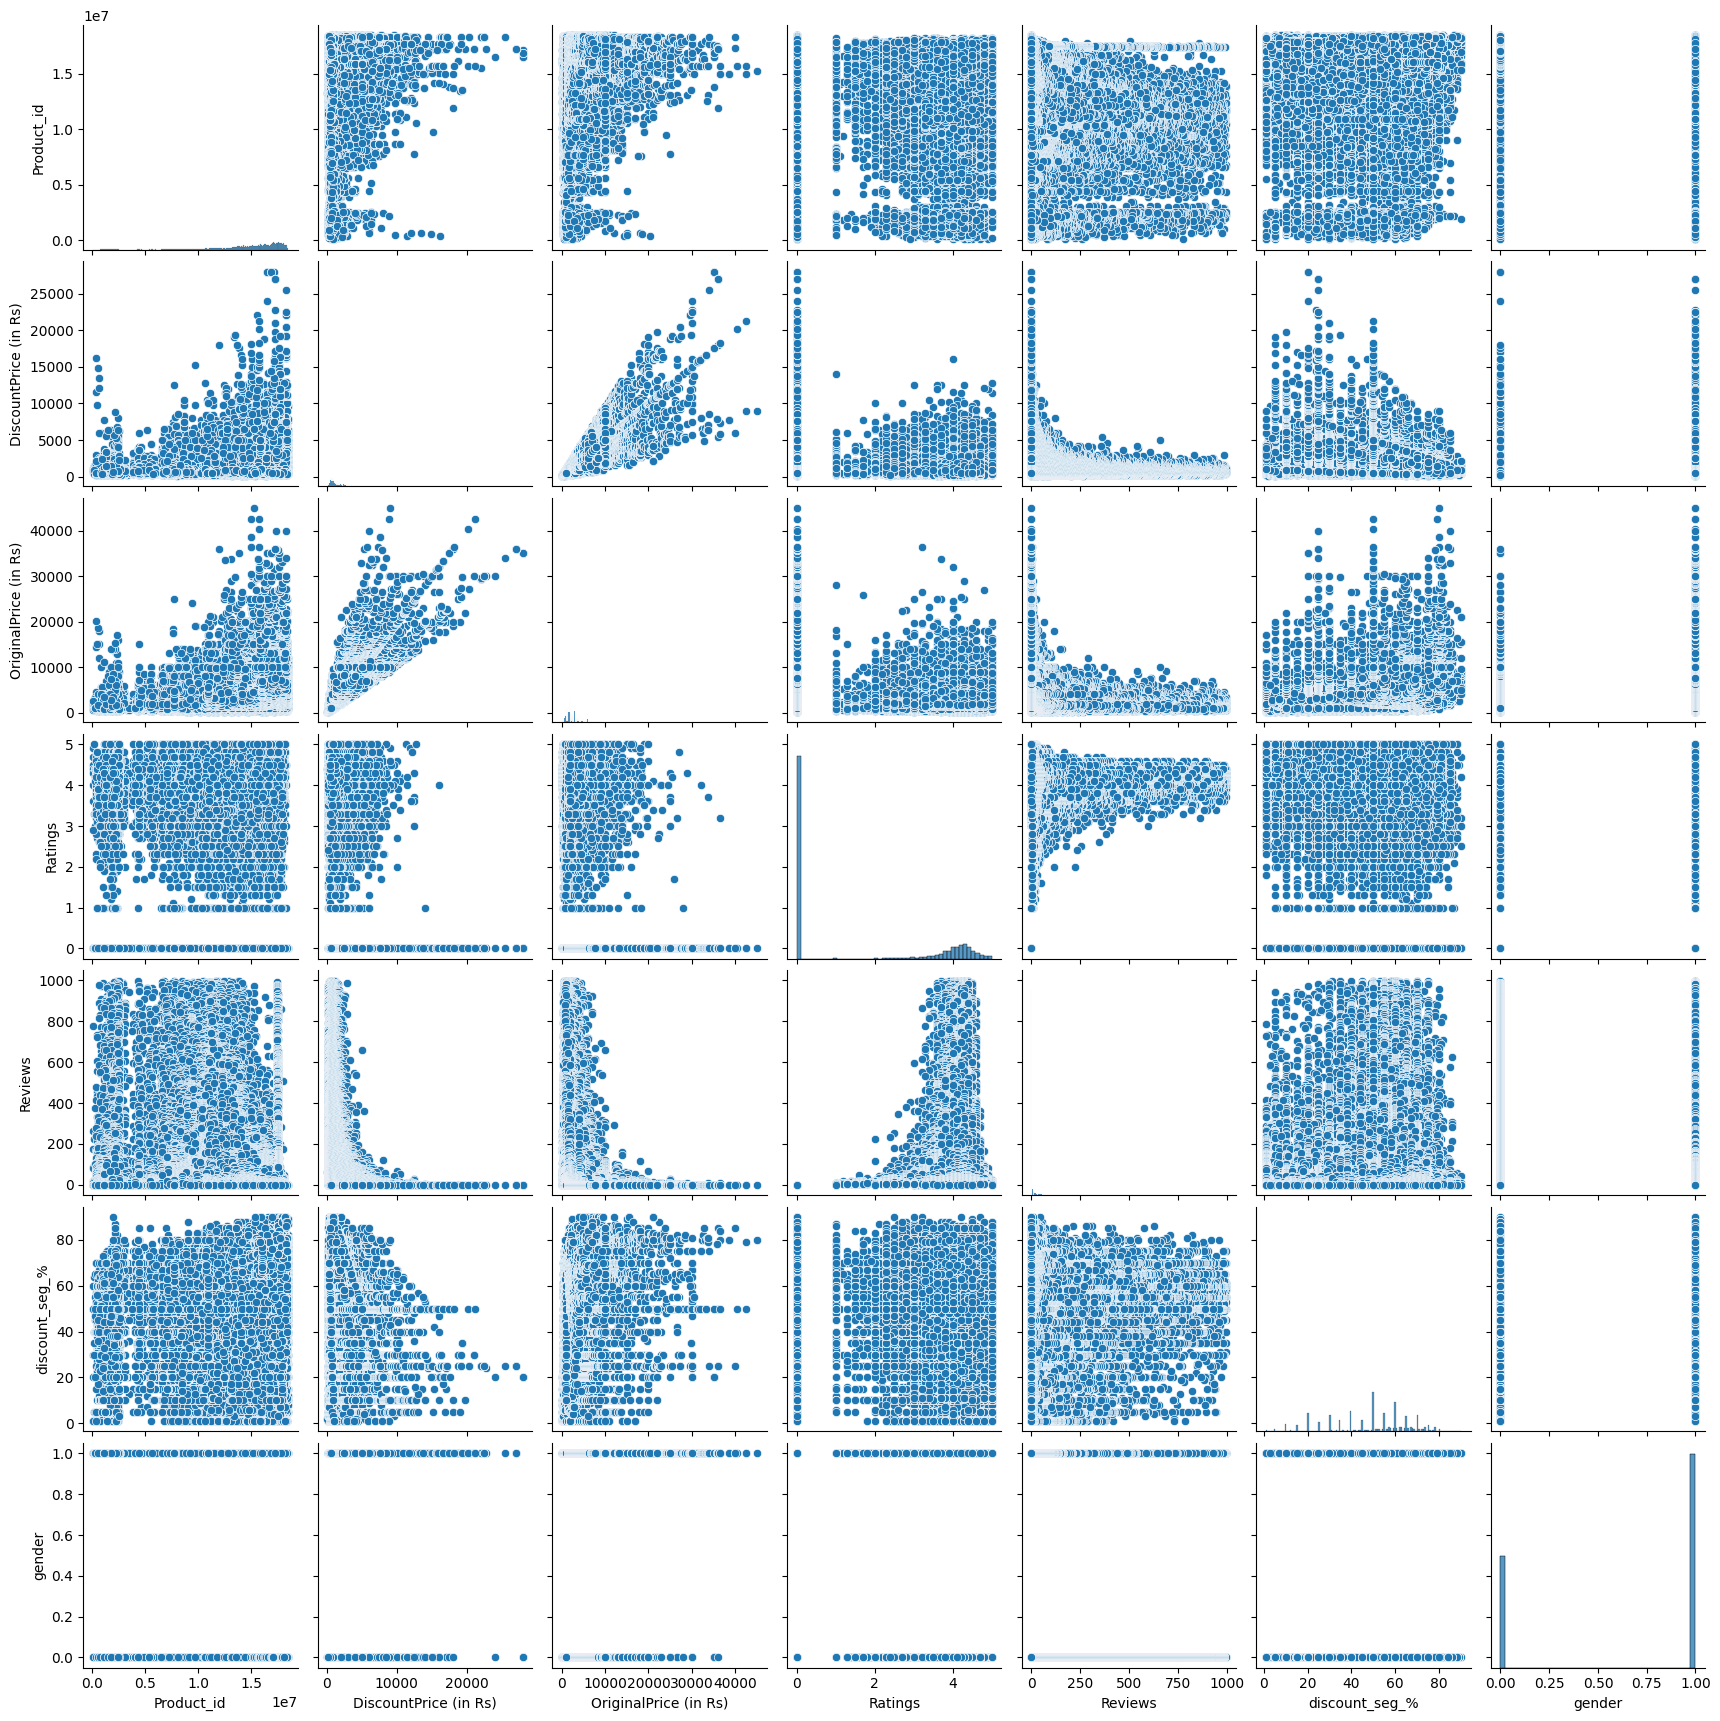

In [64]:
#  scatterplot matrix that visualizes relationships between all numerical variables in datase
sns.pairplot(model_data)

In [65]:
X_train.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'gender', 'Brand_importance', 'ind_cat_popularity',
       'cat_popularity'],
      dtype='object')

### Selecting Model Features and Handling Missing Values

In [66]:
#model featurea are selected model
model_feature = ['OriginalPrice (in Rs)','Brand_importance','ind_cat_popularity','cat_popularity','gender']

# Dataset Filtering
X_train = X_train[model_feature]
X_test = X_test[model_feature]
X_val = X_val[model_feature]
Non_Discount_data = Non_Discount_data[model_feature]

# Missing Value Handling
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_val = X_val.fillna(0)
Non_Discount_data = Non_Discount_data.fillna(0)

## Model Development

### Linear Regression Model

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [68]:
#R² Score Compares predictions to actual values
#Measures how well the model explains variance in target variable (discount_seg_%)

from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.10612979165919334
Model_Validation_Accuracy: 0.10091038142063335


### Building and Evaluating a KNN Model

In [69]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [70]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.7141678515946488
Model_Validation_Accuracy: 0.7053536369530028


### Building and Evaluating the Random Forest Regressor Model

In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.8142005483623306
Model_Validation_Accuracy: 0.8121642986392061


### Comparing Actual and Predicted Target Values for the Testing Data

In [73]:
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check

,actual,prediction
485785,27.0,33.452500
377488,60.0,40.849197
405081,25.0,31.603968
69755,60.0,56.847715
386739,50.0,74.268021
...,...,...
199982,35.0,32.379499
349241,70.0,70.325282
150383,70.0,60.255868
397742,65.0,64.735932


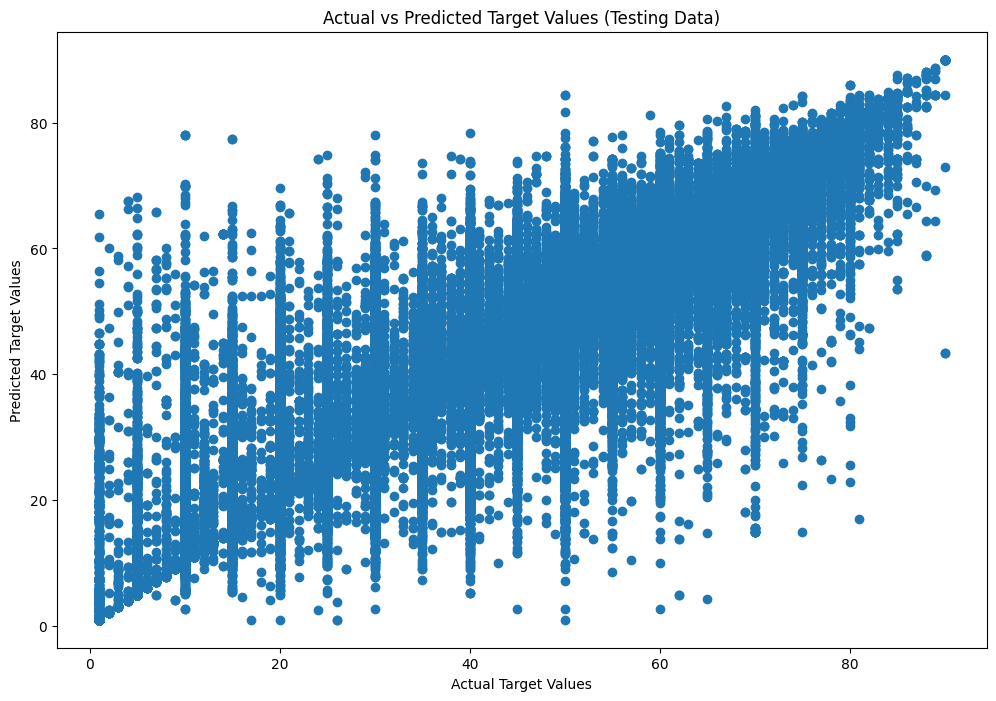

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(test_check['actual'], test_check['prediction'])
ax.set_xlabel('Actual Target Values')
ax.set_ylabel('Predicted Target Values')
ax.set_title('Actual vs Predicted Target Values (Testing Data)')
plt.show()

### Comparing Actual and Predicted Target Values for the Validation Data

In [75]:
Val_check = pd.DataFrame()
Val_check['actual'] = y_val
Val_check['prediction'] = y_val_predict
Val_check


#observation - The predicted values and actual values are quite close, which means the model is performing wel

,actual,prediction
167632,60.0,49.818588
65912,70.0,63.349101
418337,56.0,56.000000
9271,45.0,54.107354
259034,62.0,57.446476
...,...,...
416051,50.0,50.000000
218271,62.0,41.084286
43281,40.0,44.422253
489168,65.0,65.000000


### Feature Importance for Predicting the Target Variable

In [76]:
# feature importance analysis for your Random Forest mode

feature_importance = pd.DataFrame()
feature_importance['Feature'] = X_test.columns
feature_importance['Feature_importance'] = model.feature_importances_
feature_importance = feature_importance.sort_values(by='Feature_importance',ascending=False)
feature_importance

#Brand Power Matters (53%) Price Dominates (26%) Gender is Irrelevan

,Feature,Feature_importance
1,Brand_importance,0.540077
0,OriginalPrice (in Rs),0.268921
2,ind_cat_popularity,0.087923
3,cat_popularity,0.085940
4,gender,0.017139


<Axes: xlabel='Feature'>

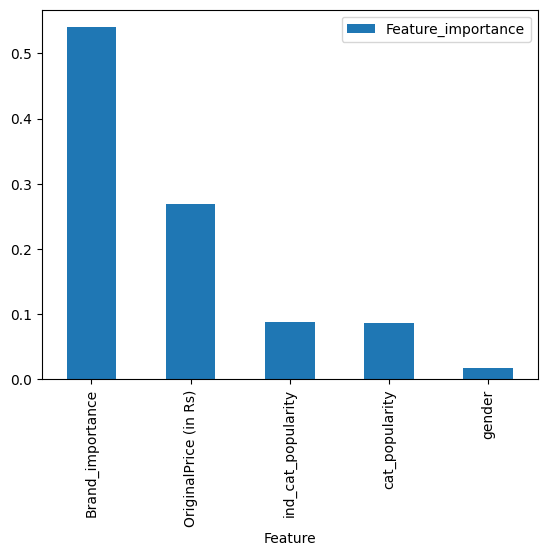

In [77]:
feature_importance.set_index('Feature').plot(kind='bar')

## Prediction on Unknown Data

In [78]:
Non_Discount_data = Non_Discount_data[X_train.columns]
Non_Discount_data['Discount_prediction'] = model.predict(Non_Discount_data)
Non_Discount_data

,OriginalPrice (in Rs),Brand_importance,ind_cat_popularity,cat_popularity,gender,Discount_prediction
0,600.0,414.955556,133.0,20426,1,24.546012
1,2499.0,410.537313,431.0,61037,1,53.180000
2,2499.0,410.537313,431.0,61037,1,53.180000
3,2499.0,410.537313,431.0,61037,1,53.180000
4,2499.0,410.537313,431.0,61037,1,53.180000
...,...,...,...,...,...,...
74126,9999.0,1545.032432,173.0,53519,1,50.441560
74127,9999.0,1545.032432,363.0,53519,1,52.133893
74128,9999.0,0.000000,586.0,53519,1,37.870000
74129,9999.0,0.000000,586.0,53519,1,37.870000


## Kernel Density Estimate of Four Features in the Training Data

<Axes: xlabel='OriginalPrice (in Rs)', ylabel='Density'>

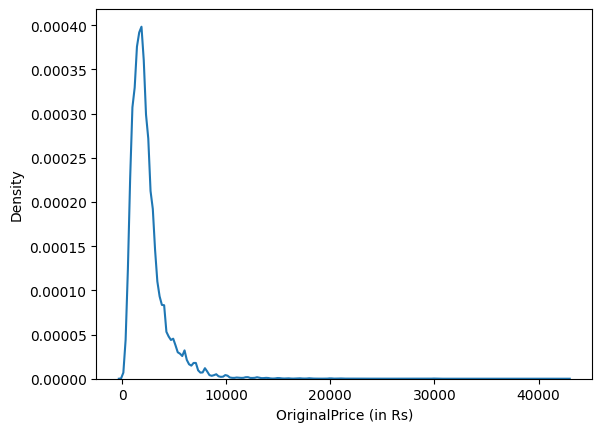

In [79]:
# estimate the probability density function (PDF) of a continuous variable (like product prices)
# Smoothed version of a histogram that shows where values are concentrated.
# Identify crowded price points (competition) vs. gaps (opportunities).
sns.kdeplot(data=X_train,x='OriginalPrice (in Rs)')

<Axes: xlabel='Brand_importance', ylabel='Density'>

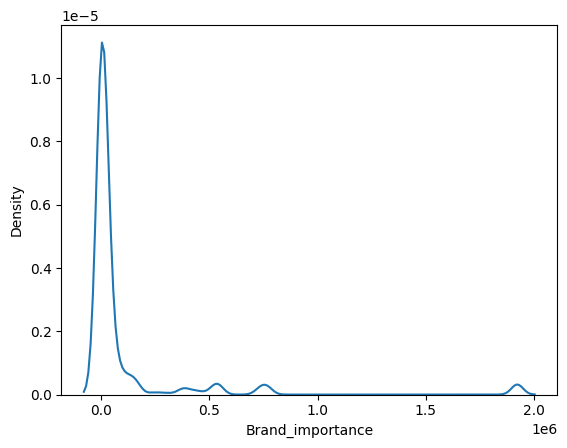

In [81]:
sns.kdeplot(data=X_train,x='Brand_importance')

<Axes: xlabel='cat_popularity', ylabel='Density'>

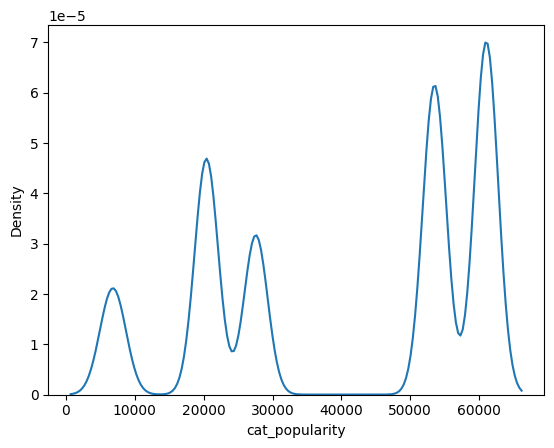

In [82]:
sns.kdeplot(data=X_train,x='cat_popularity')

<Axes: xlabel='ind_cat_popularity', ylabel='Density'>

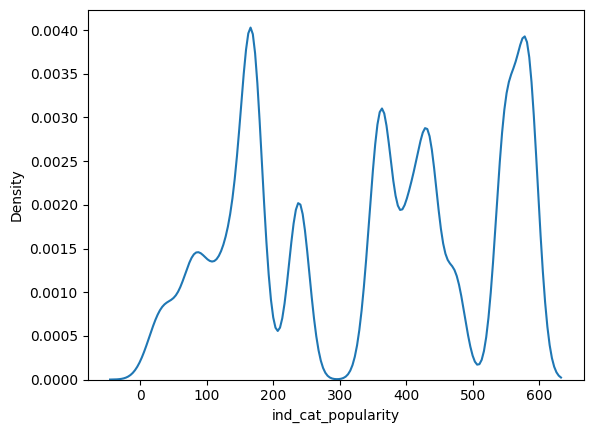

In [83]:
sns.kdeplot(data=X_train,x='ind_cat_popularity')

#### Note:
We observe that there is a high imbalance in the magnitude of data for each feature. The data for each feature varies significantly over the range. To improve the performance of the model, we can consider scaling the data using log transformation. This transformation can help reduce the impact of outliers and bring the data to a more comparable magnitude, thus improving the performance of the model.

In [84]:
X_train.columns

Index(['OriginalPrice (in Rs)', 'Brand_importance', 'ind_cat_popularity',
       'cat_popularity', 'gender'],
      dtype='object')

### Logarithmic Transformation of Features for Improved Modeling

In [86]:
eps = 0.001

X_train['Brand_importance']=np.log(X_train.pop('Brand_importance')+eps)
X_train['OriginalPrice (in Rs)']=np.log(X_train.pop('OriginalPrice (in Rs)')+eps)
X_train['ind_cat_popularity']=np.log(X_train.pop('ind_cat_popularity')+eps)
X_train['cat_popularity']=np.log(X_train.pop('cat_popularity')+eps)

X_test['Brand_importance']=np.log(X_test.pop('Brand_importance')+eps)
X_test['OriginalPrice (in Rs)']=np.log(X_test.pop('OriginalPrice (in Rs)')+eps)
X_test['ind_cat_popularity']=np.log(X_test.pop('ind_cat_popularity')+eps)
X_test['cat_popularity']=np.log(X_test.pop('cat_popularity')+eps)

X_val['Brand_importance']=np.log(X_val.pop('Brand_importance')+eps)
X_val['OriginalPrice (in Rs)']=np.log(X_val.pop('OriginalPrice (in Rs)')+eps)
X_val['ind_cat_popularity']=np.log(X_val.pop('ind_cat_popularity')+eps)
X_val['cat_popularity']=np.log(X_val.pop('cat_popularity')+eps)

The logarithmic transformation is applied to the features of the training, testing and validation data. The purpose of this transformation is to make the data more normally distributed and easier to model. The logarithm is applied to the values in the feature column and the result is stored in the same column. A small value eps (0.001) is added to the values before taking the logarithm to avoid taking the logarithm of zero.

<Axes: xlabel='OriginalPrice (in Rs)', ylabel='Density'>

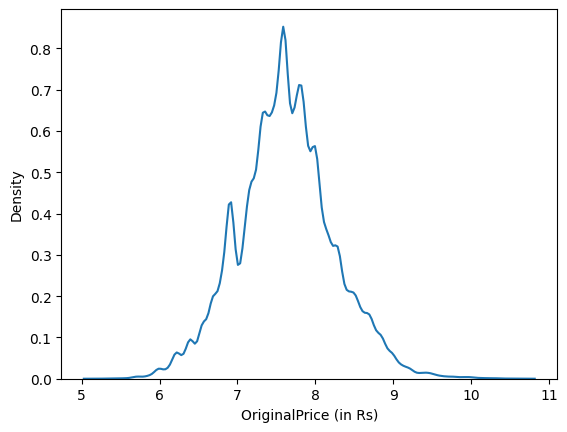

In [87]:
sns.kdeplot(data=X_train,x='OriginalPrice (in Rs)')

<Axes: xlabel='cat_popularity', ylabel='Density'>

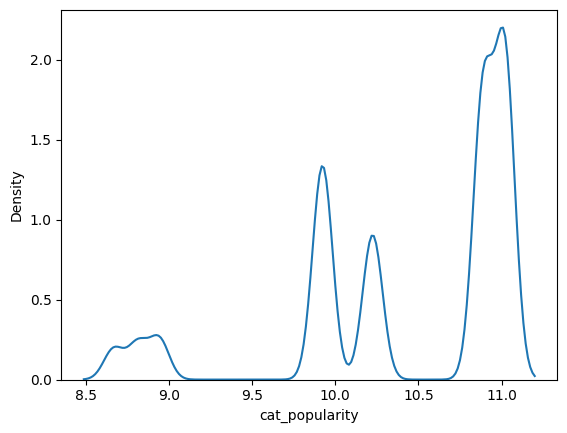

In [88]:
sns.kdeplot(data=X_train,x='cat_popularity')

<Axes: xlabel='ind_cat_popularity', ylabel='Density'>

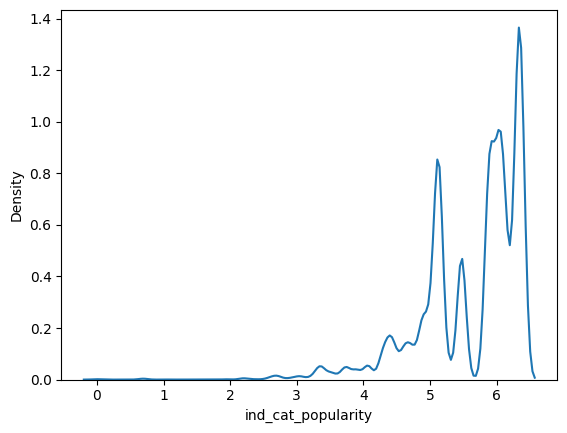

In [89]:
sns.kdeplot(data=X_train,x='ind_cat_popularity')

After scaling the data, we noticed that the magnitude of each feature is more balanced and the distribution is closer to a normal distribution. This is important because some machine learning models are sensitive to the scale of the input features. By log transforming the data, we improved the alignment with a normal distribution, which can improve the performance of our model.

In [90]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [91]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.16434566461079825
Model_Validation_Accuracy: 0.16204022619480207


The accuracy of the model has improved after taking the log of the data. Before the transformation, the test accuracy was 0.106 and validation accuracy was 0.100. After the transformation, the test accuracy increased to 0.164 and validation accuracy increased to 0.162.

In [92]:
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [93]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.7348058919182205
Model_Validation_Accuracy: 0.7334364675096561


As we can see, the accuracy of the model has improved after transforming the features. The test accuracy improved from 0.714 to 0.735 and the validation accuracy improved from 0.705 to 0.733.

In [95]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [96]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.8140136389370356
Model_Validation_Accuracy: 0.8120236765899997


The model accuracy before taking log of the features was around 81.46% for the test data and 81.22% for the validation data. After taking log of the features, the model accuracy was around 81.44% for the test data and 81.24% for the validation data. As we can see, the difference in accuracy is very minimal, indicating that taking log of the features did not have a significant impact on the model's accuracy.

### Prediction of Discount Percentage for Non-Discounted Products using Log-Transformed Data and Random Forest Regressor

In [97]:
Non_Discount_data = Non_Discount_data[X_train.columns]
Non_Discount_data['Discount_prediction'] = model.predict(Non_Discount_data)
Non_Discount_data

,gender,Brand_importance,OriginalPrice (in Rs),ind_cat_popularity,cat_popularity,Discount_prediction
0,1,414.955556,600.0,133.0,20426,67.767500
1,1,410.537313,2499.0,431.0,61037,67.767500
2,1,410.537313,2499.0,431.0,61037,67.767500
3,1,410.537313,2499.0,431.0,61037,67.767500
4,1,410.537313,2499.0,431.0,61037,67.767500
...,...,...,...,...,...,...
74126,1,1545.032432,9999.0,173.0,53519,67.767500
74127,1,1545.032432,9999.0,363.0,53519,67.767500
74128,1,0.000000,9999.0,586.0,53519,60.198564
74129,1,0.000000,9999.0,586.0,53519,60.198564


In [98]:
import joblib

joblib.dump(model, 'myntra_discount_model.pkl')


['myntra_discount_model.pkl']